# Projektna naloga pri predmetu Programiranje 1
_Matej Melanšek_

In [2]:
import pandas as pd

In [5]:
igralci = pd.read_csv('podatki.csv')

Za vsakega izmed igralcev najboljših petih evropskih nogometnih lig (Premier Ligue - GB1, LaLiga - ES1, Bundesliga - L1, Serie A - IT1, Ligue 1 - FR1) sem zajel njihovo ime, tržno vrednost, starost, državljanstvo, močnejšo nogo in ligo v kateri igrajo.

S temi podatki bom poskušal potrditi ali pa odvreči hipoteze:
- najdražji igralci so Brazilci
- LaLiga (ES1) ima povprečno najnižje igralce
- Serie A (IT1) ima povprečno najstarejše igralce
- delež nogometašev najboljših petih evropskih lig, ki so levičarji je večji kot delež levičarjev v splošni populaciji

In [67]:
igralci

,ID,Ime,TrznaVrednost,Starost,Visina,Drzavljanstvo,MocnejsaNoga,Liga
0,2857,Eldin Jakupovic,0.30,36,191.0,Switzerland,right,GB1
1,3333,James Milner,3.00,35,175.0,England,right,GB1
2,3455,Zlatan Ibrahimovic,4.00,39,195.0,Sweden,both,IT1
3,5578,Nicolas Penneteau,0.20,40,185.0,France,left,FR1
4,6442,Antonio Rosati,0.10,38,195.0,Italy,right,IT1
...,...,...,...,...,...,...,...,...
2763,859396,Metinho,5.00,18,178.0,Brazil,right,FR1
2764,876034,Yanis Guermouche,0.15,20,192.0,France,NaN,FR1
2765,880169,Nabil Ouennas,0.10,18,195.0,Algeria,NaN,FR1
2766,880330,Moïse Sahi Dion,0.80,19,175.0,Cote d'Ivoire,left,FR1


---
## Hipozeta 1:
Najdražji igralci so Brazilci

In [54]:
igralci.groupby('Drzavljanstvo').size()

Drzavljanstvo
Albania       13
Algeria       24
Angola         3
Argentina     66
Armenia        4
              ..
Uzbekistan     1
Venezuela      5
Wales         13
Zambia         2
Zimbabwe       3
Length: 108, dtype: int64

---
## Hipoteza 2:
LaLiga (ES1) ima povprečno najnižje igralce

In [23]:
igralci.groupby('Liga').Visina.mean()

Liga
ES1    181.087891
FR1    181.922535
GB1    182.843066
IT1    183.969492
L1     184.009653
Name: Visina, dtype: float64

<AxesSubplot:xlabel='Liga'>

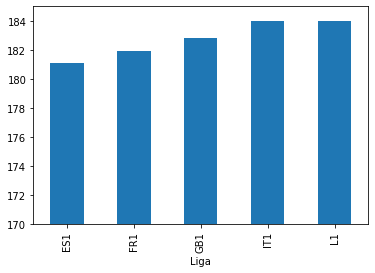

In [27]:
igralci.groupby('Liga').Visina.mean().plot.bar(ylim=(170,185))

Pričakovano je, zaradi velikega deleža španskih igralcev v LaLaligi, ta hipoteza potrjena. Presenetljivo pa je, da kljub temu da je Serie A znana po visokih, fizičnih, obrambnih igralcih, povprečna višina v Bundesligi nekoliko višja.

---
## Hipozeta 3:
Serie A (IT1) ima povprečno najstarejše igralce

In [40]:
igralci.groupby('Liga').Starost.mean()

Liga
ES1    26.877193
FR1    24.554007
GB1    26.034420
IT1    25.869421
L1     24.791985
Name: Starost, dtype: float64

<AxesSubplot:xlabel='Liga'>

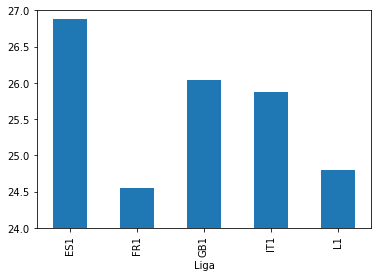

In [41]:
igralci.groupby('Liga').Starost.mean().plot.bar(ylim=(24,27))

Hipoteza je odvržena, najstarejše igralce ima LiLiga. Serie A ni niti na drugem mestu, kajti ima Premier liga povprečno nekoliko starejše igralce. 

---
## Hipoteza 4:
Delež nogometašev najboljših petih evropskih lig, ki so levičarji je večji kot delež levičarjev v splošni populaciji

Delež ljudi, ki raje uporablja desno nogo v splošni populaciji je 81.0% ([wikipedija](https://en.wikipedia.org/wiki/Laterality#Human "wikipedija"), tabela po razdelkom Human)

In [61]:
st_igralcev = igralci['MocnejsaNoga'].dropna().count()
igralci.groupby('MocnejsaNoga').size() / st_igralcev

MocnejsaNoga
both     0.042404
left     0.251844
right    0.705752
dtype: float64

<AxesSubplot:ylabel='Močnejše noge nogogetašev'>

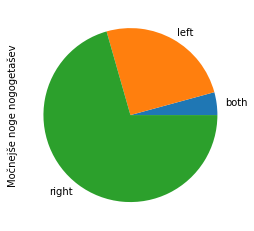

In [66]:
(igralci.groupby('MocnejsaNoga').size() / st_igralcev).plot.pie(ylabel = 'Močnejše noge nogogetašev')